In [37]:
#enough weather data without weather id - unclear as to what it represents. 
df=df=df.drop(["weather_id"],axis=1)


In [38]:
df.head()

,number,available_bike_stands,available_bikes,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt
0,58,29,11,Clouds,280.78,274.91,281.15,280.15,1034,71,6.17,2021-02-04 12:13:00
1,19,23,7,Clouds,281.16,278.41,282.04,280.15,1026,76,2.06,2021-03-22 05:29:00
2,61,18,7,Clear,280.22,276.22,280.93,278.71,1013,87,4.12,2021-03-25 04:18:00
3,53,37,3,Clouds,278.85,275.54,279.26,278.15,1032,81,4.63,2021-02-04 07:18:00
4,98,40,0,Clouds,286.17,285.15,286.48,285.37,1026,62,8.23,2021-04-04 13:35:00


In [39]:
df.describe()

,number,available_bike_stands,available_bikes,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed
count,354572.000000,354572.000000,354572.000000,354572.000000,354572.000000,354572.000000,354572.000000,354572.000000,354572.000000,354572.000000
mean,60.660250,22.571097,9.367322,282.178928,278.145814,283.090327,281.158659,1019.609244,78.175098,5.149635
std,37.321338,9.382809,7.061078,3.244767,3.565726,3.056429,3.485513,9.427372,9.987529,2.317446
min,2.000000,0.000000,0.000000,274.350000,266.510000,275.150000,271.150000,997.000000,57.000000,0.510000
25%,31.000000,16.000000,4.000000,280.520000,276.190000,281.150000,279.150000,1013.000000,71.000000,3.090000
50%,61.000000,23.000000,8.000000,281.940000,277.980000,282.590000,280.930000,1019.000000,77.000000,4.630000
75%,90.000000,30.000000,13.000000,284.440000,280.300000,285.150000,283.150000,1027.000000,87.000000,7.200000
max,507.000000,40.000000,40.000000,289.750000,287.820000,292.040000,289.150000,1036.000000,100.000000,12.860000


In [40]:
df=df=df.drop(["available_bike_stands"],axis=1)

In [41]:
df.head()

,number,available_bikes,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt
0,58,11,Clouds,280.78,274.91,281.15,280.15,1034,71,6.17,2021-02-04 12:13:00
1,19,7,Clouds,281.16,278.41,282.04,280.15,1026,76,2.06,2021-03-22 05:29:00
2,61,7,Clear,280.22,276.22,280.93,278.71,1013,87,4.12,2021-03-25 04:18:00
3,53,3,Clouds,278.85,275.54,279.26,278.15,1032,81,4.63,2021-02-04 07:18:00
4,98,0,Clouds,286.17,285.15,286.48,285.37,1026,62,8.23,2021-04-04 13:35:00


In [42]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns]
df[category_columns].describe().T

,count,unique,top,freq
weather_main,354572,5,Clouds,317063


<AxesSubplot:>

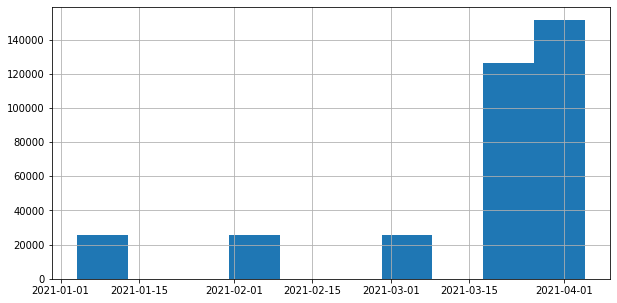

In [43]:
df['dt'].hist(figsize=(10,5),bins=10)

In [44]:
contindata=df[['available_bikes','number','dt','main_feels_like','wind_speed']]

contindata.head()

,available_bikes,number,dt,main_feels_like,wind_speed
0,11,58,2021-02-04 12:13:00,274.91,6.17
1,7,19,2021-03-22 05:29:00,278.41,2.06
2,7,61,2021-03-25 04:18:00,276.22,4.12
3,3,53,2021-02-04 07:18:00,275.54,4.63
4,0,98,2021-04-04 13:35:00,285.15,8.23


<AxesSubplot:>

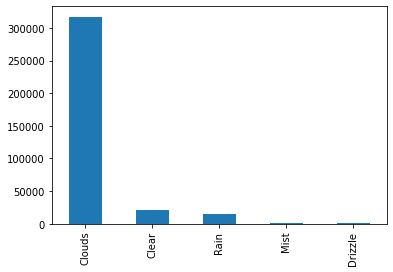

In [47]:
#barplot for categorical data type current status.

df['weather_main'].value_counts().plot(kind='bar')
plt.savefig('imgclouds.png')

#results of this tell me that this may not be helpfull when determining predictions as all data has almost the same. 



In [48]:
category=pd.cut(df.available_bikes,bins=[0,10,20,30,40],labels=['0_10','11_20','21_30','31_40'])

df.insert(2,"cat_BA",category)

In [49]:
df.head()

,number,available_bikes,cat_BA,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt
0,58,11,11_20,Clouds,280.78,274.91,281.15,280.15,1034,71,6.17,2021-02-04 12:13:00
1,19,7,0_10,Clouds,281.16,278.41,282.04,280.15,1026,76,2.06,2021-03-22 05:29:00
2,61,7,0_10,Clear,280.22,276.22,280.93,278.71,1013,87,4.12,2021-03-25 04:18:00
3,53,3,0_10,Clouds,278.85,275.54,279.26,278.15,1032,81,4.63,2021-02-04 07:18:00
4,98,0,NaN,Clouds,286.17,285.15,286.48,285.37,1026,62,8.23,2021-04-04 13:35:00


In [50]:
df.to_csv('cleaned_p_of_train_to_test_lr')

In [51]:
df=pd.read_csv('cleaned_p_of_train_to_test_lr')

In [52]:
df.head()

,Unnamed: 0,number,available_bikes,cat_BA,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt
0,0,58,11,11_20,Clouds,280.78,274.91,281.15,280.15,1034,71,6.17,2021-02-04 12:13:00
1,1,19,7,0_10,Clouds,281.16,278.41,282.04,280.15,1026,76,2.06,2021-03-22 05:29:00
2,2,61,7,0_10,Clear,280.22,276.22,280.93,278.71,1013,87,4.12,2021-03-25 04:18:00
3,3,53,3,0_10,Clouds,278.85,275.54,279.26,278.15,1032,81,4.63,2021-02-04 07:18:00
4,4,98,0,NaN,Clouds,286.17,285.15,286.48,285.37,1026,62,8.23,2021-04-04 13:35:00


In [53]:
df=df.drop(['percent','Unnamed: 0'],axis=1)

KeyError: "['percent'] not found in axis"

In [139]:
df.head()

,number,available_bikes,cat_BA,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt
0,39,2,0_10,Rain,278.51,269.37,278.71,278.15,1003,70,10.29,2021-03-26 18:45:00
1,90,15,11_20,Clouds,278.53,275.41,279.15,278.15,1031,87,4.12,2021-02-04 05:48:00
2,38,12,11_20,Clouds,287.22,286.69,287.59,286.48,1019,77,2.06,2021-03-31 12:00:00
3,8,7,0_10,Clouds,280.94,277.96,282.04,280.15,1026,81,2.57,2021-03-22 05:44:00
4,66,8,0_10,Clouds,277.46,273.16,278.71,276.15,1000,81,3.60,2021-03-26 07:37:00
